<a href="https://colab.research.google.com/github/ahmadhajmosa/Machine-learning-labs/blob/Mareike/Session_2_Day2_1100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab on Machine Learning and Applications in Intelligent Vehicles
## Session 1: Introduction


#Session 2: 05.06 - 13:00 - 14:30 :




## Intro:

Tensorflow is a powerful framework for implementing and deploying large-scale deep learning models. Recently, it has been widely used in both reasearch and production. TF objective is to combine scale and flexibility.

In the past session, we will learning the following:

1. TF programming stack
2. TF programming concepts including computatoin graphs, operations and sessions. 
3. Implementation of linear regression
4. Implementation of feed-forward neural networks

## TF stack:

TensorFlow is a framework composed of two core building blocks — a library for defining computational graphs and a runtime for executing such graphs on a variety of different hardware


![alt text](https://www.tensorflow.org/images/layers.png)


Before goining into details about the stack, let us talk about computational graphs.

### Computational Graphs

A directed graph is a data structure consisting of nodes (vertices) and edges. It’s a set of vertices connected pairwise by directed edges.

Graphs come in many shapes and sizes and are used to solve many real-life problems, such as representing networks including telephone networks, circuit networks, road networks, and even social networks. 
![alt text](https://cdn-images-1.medium.com/max/800/1*V6aYjD3AxDbEKYahkGqVQw.png)

TensorFlow uses directed graphs internally to represent computations, and they call this data flow graphs (or computational graphs).

The nodes in TF data flow graph mostly represents operations, variables and placeholders.

Take for example the following operation:
![alt text](https://cdn-images-1.medium.com/max/800/1*6E3sfit6DCeJ9mOz17g4bA.png)

To create a computational graph out of this program, we create nodes for each of the operations in our program, along with the input variables a and b. In fact, a and b could be constants if they don’t change. If one node is used as the input to another operation we draw a directed arrow that goes from one node to another.

The computational graph for this program might look like this:
![alt text](https://cdn-images-1.medium.com/max/800/1*vPb9E0Yd1QUAD0oFmAgaOw.png)

Operations create or manipulate data according to specific rules. In TensorFlow those rules are called Ops, short for operations. Variables on the other hand represent shared, persistent state that can be manipulated by running Ops on those variables.

The questions now what are the advantages of representing operations as directed graphs: The main advantage of using directed graphs is the ability to do **parallelism** and what is called **dependency driving scheduling**. 
For example, consider again the follwoing code:
![alt text](https://cdn-images-1.medium.com/max/800/1*6E3sfit6DCeJ9mOz17g4bA.png)
At the most fundamental level, most computer programs are mainly composed of two things — primitive operations and an order in which these operations are executed, often sequentially, line by line. This means we would first multiply a and b and only when this expression was evaluated we would take their sum. Computational graphs on the otherhand, exclusively specify the dependencies across the operations.
If we look at our computational graph we see that we could execute the multiplication and addition in parallel. That’s because these two operations do not depend on each other.
 So we can use the topology of the graph to drive the scheduling of operations and execute them in the most efficient manner, e.g. using multiple GPUs on a single machine or even distribute the execution across multiple machines.
 Another key advantage is portability. The graph is a language-independent representation of our code. So we can build the graph in Python, save the model (TensorFlow uses protocol buffers), and restore the model in a different language, say C++, if you want to go really fast.
 
 

--------------------------------
# References:

https://medium.com/@d3lm/understand-tensorflow-by-mimicking-its-api-from-scratch-faa55787170d

https://www.tensorflow.org/guide/extend/architecture

https://www.tensorflow.org/guide/low_level_intro

  
 






# placeholder: tensors are feeded externaly for example inputs tensors + output tensors

# variables : tensors represent the parameters of the network/graph ie. nn weights

In [3]:
import tensorflow as tf
import numpy as np

# Parameters
learning_rate = 0.001
training_iters = 2000
batch_size = 128

# Network Parameters

num_inputs = 3
num_outputs = 4
num_samples= 10
# Training data
x_gr = np.random.rand(num_samples,num_inputs)
y_gr = np.random.rand(num_samples,num_outputs)


# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs])
y = tf.placeholder(tf.float32, [None, num_outputs])


# weights 
w_1 = tf.Variable(tf.random_normal([num_inputs,num_outputs ]))

# model
y_p = tf.matmul(x, w_1)


# cost

cost = tf.reduce_mean(tf.pow(y-y_p,2)) # 

# optimisation 

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights

init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(10):
    
        sess.run(optimizer, feed_dict={x: x_gr, y: y_gr}) 

        pr_cost = sess.run(cost, feed_dict={x: x_gr,y: y_gr})
    
        print('iter: ',i, 'cost: ', pr_cost)
    
    y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    print('predicted ', y_p_p)
    print('real ', y_gr)



iter:  0 cost:  0.9567358
iter:  1 cost:  0.9539652
iter:  2 cost:  0.951203
iter:  3 cost:  0.94844884
iter:  4 cost:  0.9457032
iter:  5 cost:  0.9429661
iter:  6 cost:  0.94023764
iter:  7 cost:  0.93751794
iter:  8 cost:  0.9348072
iter:  9 cost:  0.93210554
predicted  [[-1.1450858  -0.14221841 -0.35067135  0.65120935]
 [-1.3594449  -0.00907362 -0.5323392   0.42826703]
 [-0.7996197  -0.01041654 -0.24933046  0.48573765]
 [-0.5929109   0.51758724 -0.2552371   0.38002816]
 [-1.606602    0.8798877  -0.7025176   0.70998484]
 [-1.1750624   0.08919913 -0.38617224  0.6963331 ]
 [-0.83948016  0.14661932 -0.42410484 -0.00785731]
 [-1.3439475   0.567891   -0.5157015   0.7709065 ]
 [-1.2579513   0.52138865 -0.44979548  0.83817464]
 [-0.9601366   0.16170472 -0.37160578  0.4085331 ]]
real  [[0.21396109 0.9421288  0.76972979 0.77633396]
 [0.74212854 0.95306322 0.17131288 0.42783834]
 [0.88641767 0.48228396 0.81849312 0.01042035]
 [0.06451769 0.42909106 0.02890062 0.50857984]
 [0.4191167  0.302870

In [4]:
sess = tf.Session() 
sess.run(init)
    
for i in range(10):
    
        sess.run(optimizer, feed_dict={x: x_gr, y: y_gr}) 

        pr_cost = sess.run(cost, feed_dict={x: x_gr,y: y_gr})
    
        print('iter: ',i, 'cost: ', pr_cost)
    
y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
print('predicted ', y_p_p)
print('real ', y_gr)

#sess.close()

iter:  0 cost:  0.933582
iter:  1 cost:  0.9304617
iter:  2 cost:  0.9273497
iter:  3 cost:  0.9242457
iter:  4 cost:  0.9211503
iter:  5 cost:  0.91806334
iter:  6 cost:  0.9149853
iter:  7 cost:  0.91191596
iter:  8 cost:  0.90885544
iter:  9 cost:  0.905804
predicted  [[-0.80577266  0.45547467  1.613053    0.6943242 ]
 [-0.60693693  0.16865659  1.7899637   0.822078  ]
 [-0.6270362   0.25615022  1.1501061   0.45253986]
 [-0.65555495 -0.28224397  0.9245102   0.16738927]
 [-1.2381665  -0.49039274  2.3082125   0.6627027 ]
 [-0.93448025  0.26853526  1.6954129   0.63455105]
 [-0.10697274 -0.21374053  1.0097276   0.4976874 ]
 [-1.1877403  -0.13969523  1.9846401   0.5826261 ]
 [-1.2439556  -0.04544991  1.9052219   0.5322889 ]
 [-0.6054973   0.0329299   1.3288822   0.5128913 ]]
real  [[0.21396109 0.9421288  0.76972979 0.77633396]
 [0.74212854 0.95306322 0.17131288 0.42783834]
 [0.88641767 0.48228396 0.81849312 0.01042035]
 [0.06451769 0.42909106 0.02890062 0.50857984]
 [0.4191167  0.30287025

In [5]:
import tensorflow as tf
import numpy as np

# Parameters
learning_rate = 0.001
training_iters = 2000
batch_size = 128

# Network Parameters

num_inputs = 3
num_h1_n = 4
num_h2_n = 10
num_outputs = 4

num_samples= 10

# Training data
x_gr = np.random.rand(num_samples,num_inputs)
y_gr = np.random.rand(num_samples,num_outputs)


# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs])
y = tf.placeholder(tf.float32, [None, num_outputs])


# weights 
w_1 = tf.Variable(tf.random_normal([num_inputs,num_h1_n ]))
w_2 = tf.Variable(tf.random_normal([num_h1_n,num_h2_n ]))
w_3 = tf.Variable(tf.random_normal([num_h2_n,num_outputs ]))

# bias 
b_1 = tf.Variable(tf.random_normal([num_h1_n]))
b_2 = tf.Variable(tf.random_normal([num_h2_n]))
b_3 = tf.Variable(tf.random_normal([num_outputs]))




# model

h1 = tf.nn.sigmoid(tf.add(tf.matmul(x, w_1),b_1)) # model of hidden layer 1
h2 = tf.nn.sigmoid(tf.add(tf.matmul(h1, w_2),b_2)) # model of hidden layer 2
y_p = tf.add(tf.matmul(h2, w_3),b_3) # model of the output layer



# cost

cost = tf.reduce_mean(tf.pow(y-y_p,2)) # 

# optimisation 

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights

init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(10):
    
        sess.run(optimizer, feed_dict={x: x_gr, y: y_gr}) 

        pr_cost = sess.run(cost, feed_dict={x: x_gr,y: y_gr})
    
        print('iter: ',i, 'cost: ', pr_cost)
    
    y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    print('predicted ', y_p_p)
    print('real ', y_gr)



iter:  0 cost:  5.032889
iter:  1 cost:  5.0029655
iter:  2 cost:  4.9731727
iter:  3 cost:  4.9435124
iter:  4 cost:  4.9139867
iter:  5 cost:  4.8845973
iter:  6 cost:  4.8553457
iter:  7 cost:  4.8262343
iter:  8 cost:  4.7972646
iter:  9 cost:  4.7684374
predicted  [[-3.7027106  -0.22782123  0.90262574 -0.72497547]
 [-3.5993176   0.16269183  0.93029803 -0.8519965 ]
 [-3.6675653  -0.29595733  0.88509315 -0.6834185 ]
 [-3.6240702   0.07617843  0.92380375 -0.8304043 ]
 [-3.6718106  -0.19787651  0.89540833 -0.72367597]
 [-3.707831    0.13075972  0.96273917 -0.8543219 ]
 [-3.6954236   0.06085289  0.946099   -0.83829904]
 [-3.627833    0.05443722  0.9231619  -0.8314636 ]
 [-3.7189617  -0.04052752  0.9296734  -0.7793354 ]
 [-3.7315822   0.11718011  0.9693355  -0.8523264 ]]
real  [[0.76678686 0.01561226 0.98743195 0.95774421]
 [0.32350933 0.84664297 0.77837286 0.74782483]
 [0.1316868  0.16213507 0.90396275 0.97563226]
 [0.48753447 0.3131434  0.32190233 0.81130108]
 [0.43895515 0.78084168 0

In [0]:
# training data
X_train = mnist.train.images
Y_train = mnist.train.labels

# training data
X_test = mnist.test.images
Y_test = mnist.test.labels

# training data
X_val = mnist.validation.images
Y_val = mnist.validation.labels


# Parameters
learning_rate = 0.001
training_iters = 2000
batch_size = 128

# Network Parameters

num_inputs = 784
num_h1_n = 100
num_h2_n = 100
num_outputs = 10



# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs])
y = tf.placeholder(tf.float32, [None, num_outputs])


# weights 
w_1 = tf.Variable(tf.random_normal([num_inputs,num_h1_n ]))
w_2 = tf.Variable(tf.random_normal([num_h1_n,num_h2_n ]))
w_3 = tf.Variable(tf.random_normal([num_h2_n,num_outputs ]))

# bias 
b_1 = tf.Variable(tf.random_normal([num_h1_n]))
b_2 = tf.Variable(tf.random_normal([num_h2_n]))
b_3 = tf.Variable(tf.random_normal([num_outputs]))




# model

h1 = tf.nn.sigmoid(tf.add(tf.matmul(x, w_1),b_1)) # model of hidden layer 1
h2 = tf.nn.sigmoid(tf.add(tf.matmul(h1, w_2),b_2)) # model of hidden layer 2
y_p = tf.add(tf.matmul(h2, w_3),b_3) # model of the output layer



# cost

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_p, labels=y)) # cross entropy cost


# Evaluate model
correct_pred = tf.equal(tf.argmax(y_p, 1), tf.argmax(y, 1))

## 3 images, y_p=[[0.1,0.0,0,0.9],[0.9,0.1,0,0.],[0,0.9,0,0.1]] 

# tf.argmax(y_p, 1) [3,0,1] 

# 3 images, y=[[0,0.0,0,1],[0,1,0,0],[0,1,0,0]] 

# tf.argmax(y, 1) [3,1,1]

# tf.equal [True,False,True]--[1,0,1]--- 2/3 

accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
#

# optimisation 

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights

init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(1000):
        
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        # Run optimization op (backprop)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
    

        train_cost, train_acc  = sess.run([cost,accuracy], feed_dict={x: batch_x,y: batch_y})
    
        
        test_batch_x, test_batch_y = mnist.test.next_batch(batch_size)

        test_cost, test_acc  = sess.run([cost,accuracy], feed_dict={x: test_batch_x,y: test_batch_y})
        print('iter: ',i, 'train_cost: ', train_cost, 'train_acc: ', train_acc,'test_cost: ', test_cost, 'test_acc: ', test_acc )

    
    #y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    print('predicted ', y_p_p)
    print('real ', y_gr)




    

In [0]:
import tensorflow as tf 


def variable_summaries(var):
  """Attach a lot of summaries to a Tensor (for TensorBoard visualization)."""
  with tf.name_scope('summaries'):
    mean = tf.reduce_mean(var)
    tf.summary.scalar('mean', mean)
    with tf.name_scope('stddev'):
      stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
    tf.summary.scalar('stddev', stddev)
    tf.summary.scalar('max', tf.reduce_max(var))
    tf.summary.scalar('min', tf.reduce_min(var))
    tf.summary.histogram('histogram', var)




Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

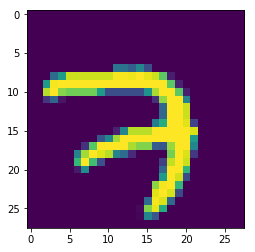

In [7]:
%matplotlib inline

from matplotlib.pyplot import imshow

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

mnist.train.images.shape

image =mnist.train.images[0].reshape((28,28))
#MNIST data input (img shape: 28*28)
imshow(image)

mnist.train.labels[0]

# CNN using Tensorflow




conv_actv_1 max [None, 28, 28, 32]
con1_after max [None, 14, 14, 32]
con2_before max [None, 14, 14, 64]
con2_after max [None, 7, 7, 64]
started
(64, 1024)


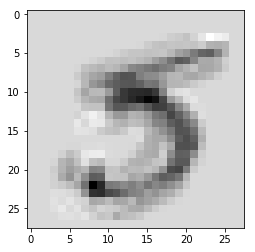

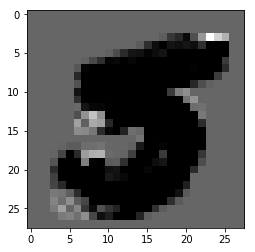

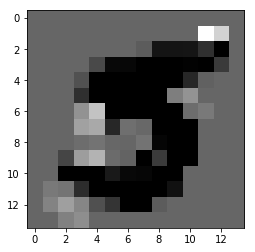

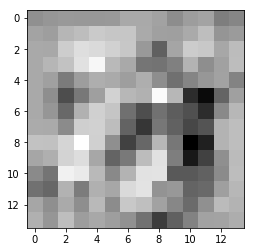

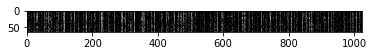

iter:  0 train_cost:  58875.367 train_acc:  0.109375 test_cost:  51669.523 test_acc:  0.25 num_of_returned_sensors: 7
(64, 1024)


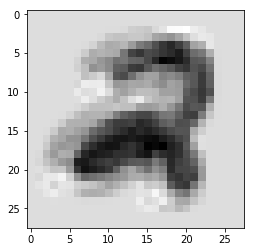

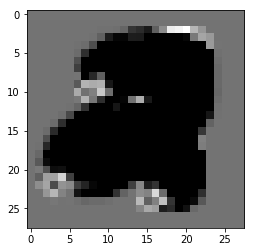

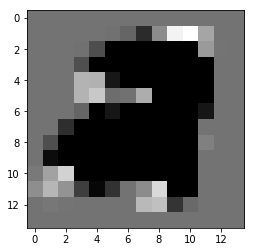

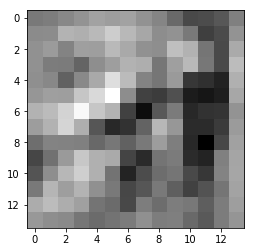

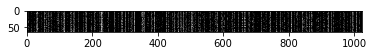

iter:  100 train_cost:  2642.0215 train_acc:  0.8125 test_cost:  1200.4434 test_acc:  0.859375 num_of_returned_sensors: 7
(64, 1024)


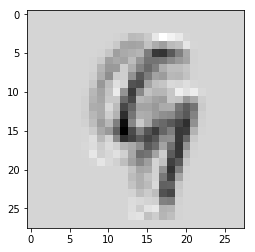

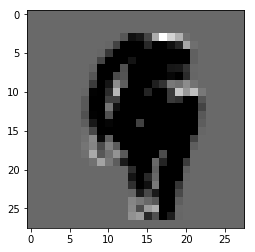

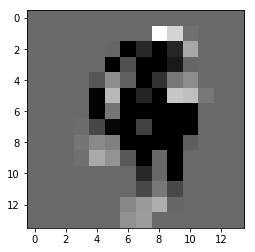

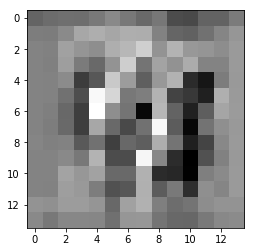

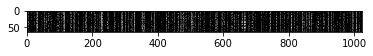

iter:  200 train_cost:  244.11963 train_acc:  0.953125 test_cost:  317.7314 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


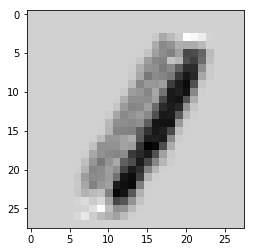

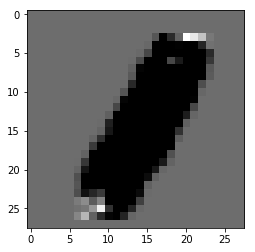

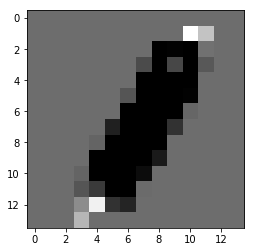

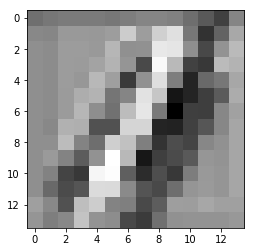

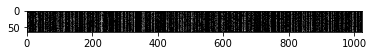

iter:  300 train_cost:  800.224 train_acc:  0.953125 test_cost:  439.87128 test_acc:  0.9375 num_of_returned_sensors: 7
(64, 1024)


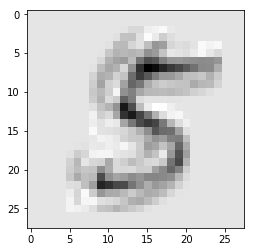

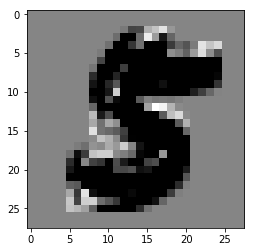

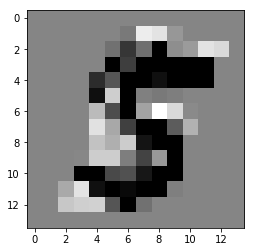

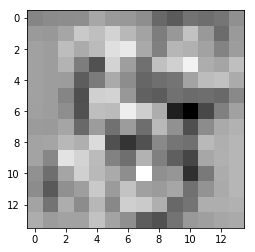

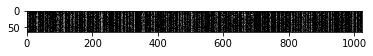

iter:  400 train_cost:  1402.4348 train_acc:  0.953125 test_cost:  1244.737 test_acc:  0.890625 num_of_returned_sensors: 7
(64, 1024)


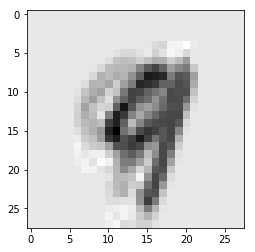

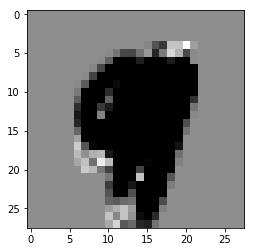

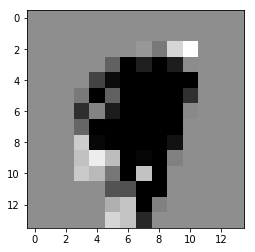

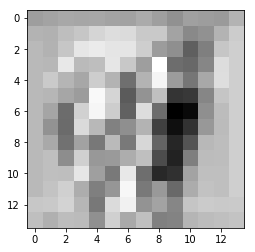

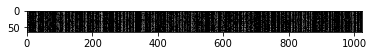

iter:  500 train_cost:  483.75702 train_acc:  0.96875 test_cost:  958.73553 test_acc:  0.9375 num_of_returned_sensors: 7
(64, 1024)


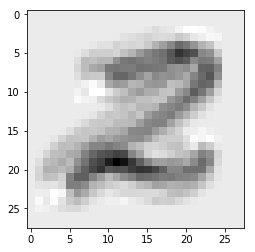

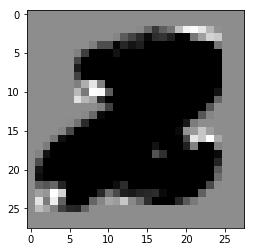

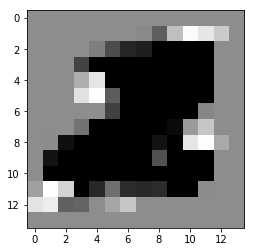

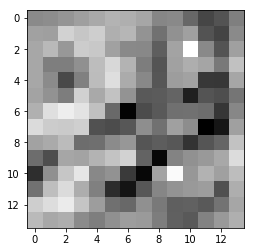

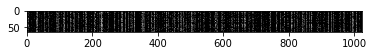

iter:  600 train_cost:  169.5636 train_acc:  0.953125 test_cost:  681.84827 test_acc:  0.9375 num_of_returned_sensors: 7
(64, 1024)


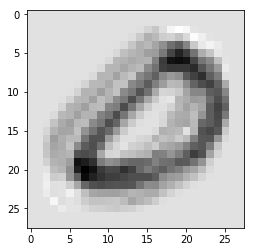

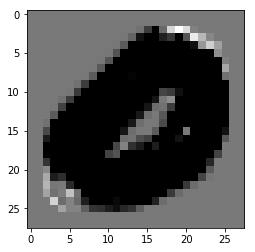

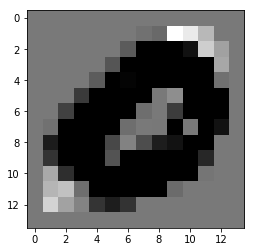

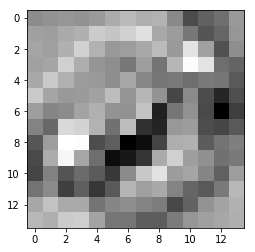

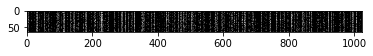

iter:  700 train_cost:  139.28564 train_acc:  0.96875 test_cost:  1245.863 test_acc:  0.9375 num_of_returned_sensors: 7
(64, 1024)


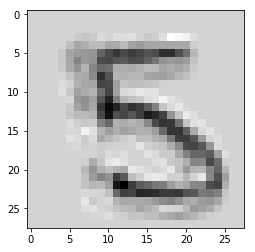

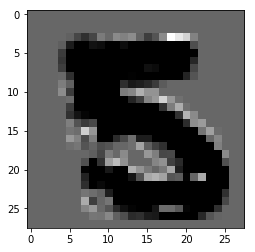

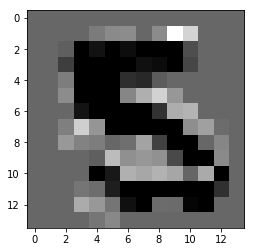

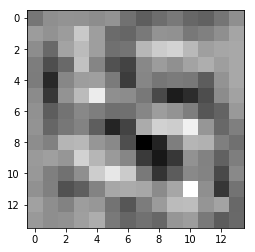

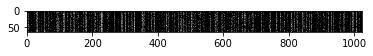

iter:  800 train_cost:  33.28366 train_acc:  0.984375 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


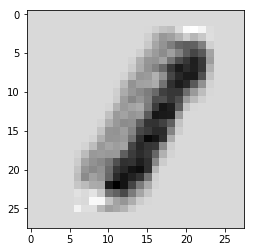

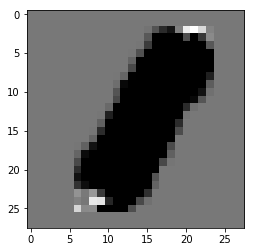

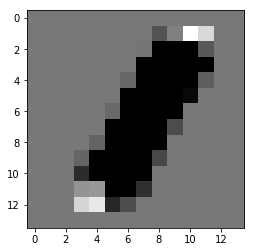

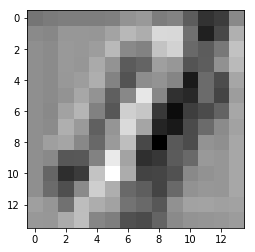

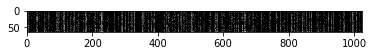

iter:  900 train_cost:  296.3467 train_acc:  0.96875 test_cost:  398.88162 test_acc:  0.9375 num_of_returned_sensors: 7
(64, 1024)


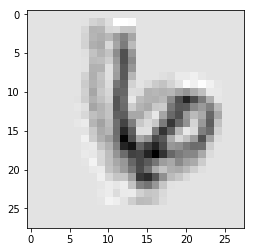

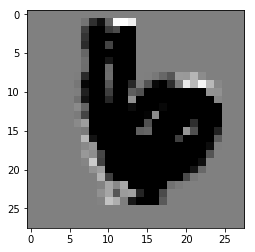

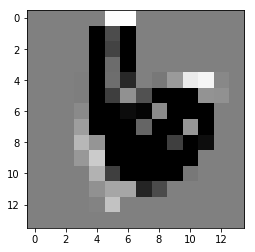

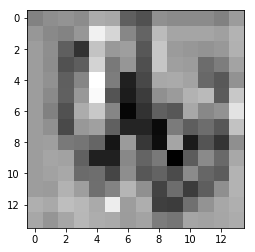

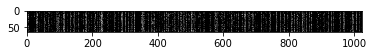

iter:  1000 train_cost:  230.66635 train_acc:  0.984375 test_cost:  382.30795 test_acc:  0.9375 num_of_returned_sensors: 7
(64, 1024)


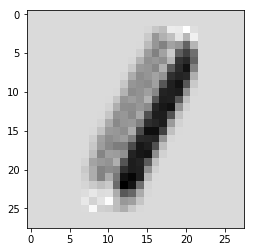

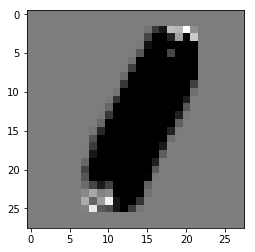

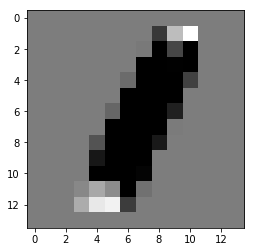

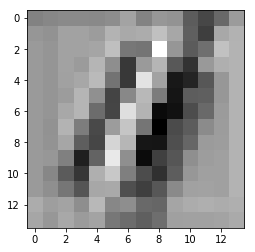

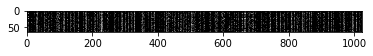

iter:  1100 train_cost:  372.72543 train_acc:  0.9375 test_cost:  231.84314 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


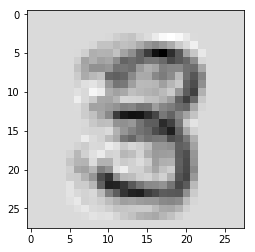

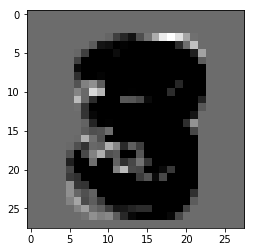

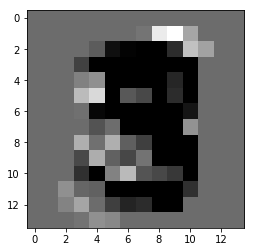

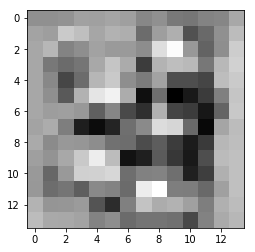

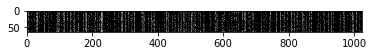

iter:  1200 train_cost:  82.23593 train_acc:  0.984375 test_cost:  337.71893 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


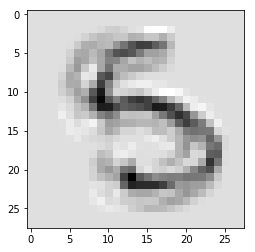

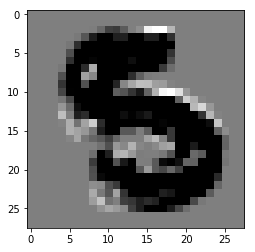

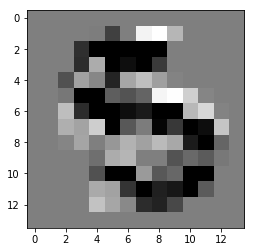

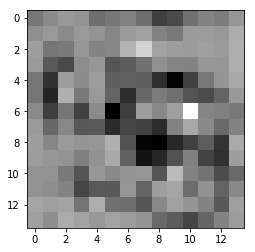

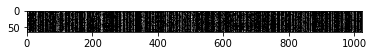

iter:  1300 train_cost:  168.39966 train_acc:  0.96875 test_cost:  305.02136 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


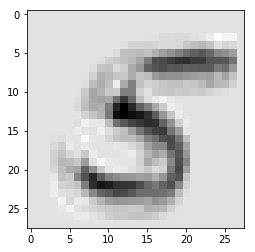

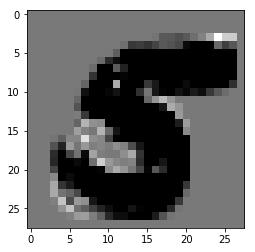

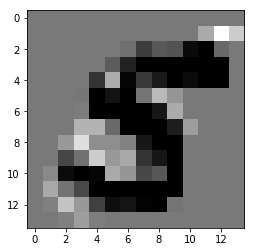

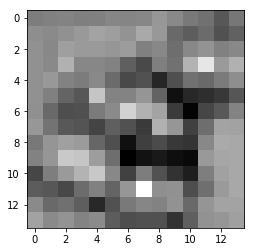

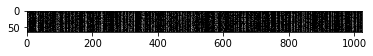

iter:  1400 train_cost:  419.36603 train_acc:  0.9375 test_cost:  313.63446 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


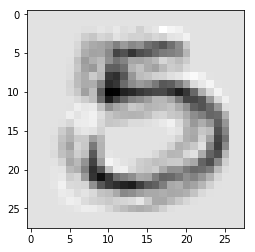

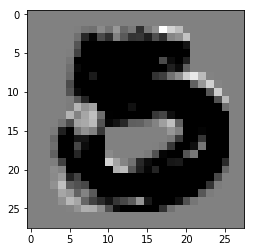

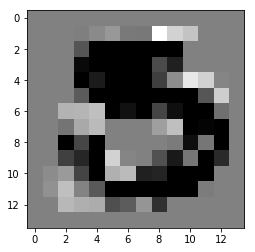

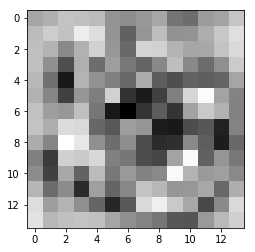

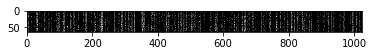

iter:  1500 train_cost:  259.28827 train_acc:  0.96875 test_cost:  650.8263 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


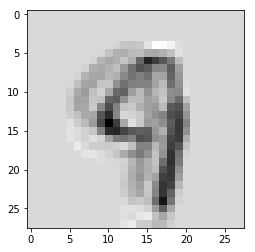

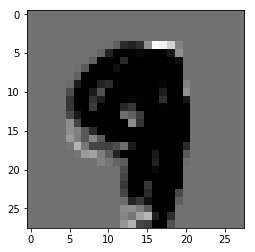

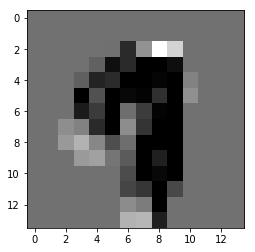

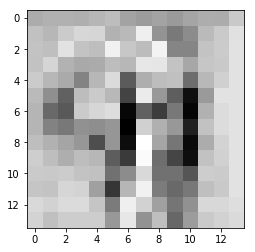

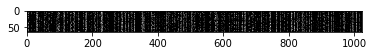

iter:  1600 train_cost:  237.15858 train_acc:  0.953125 test_cost:  468.4312 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


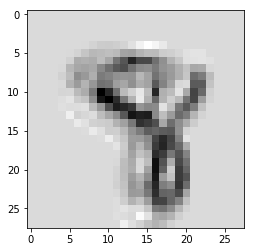

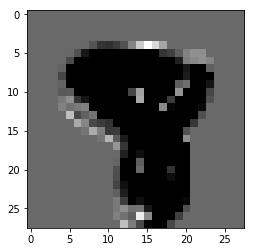

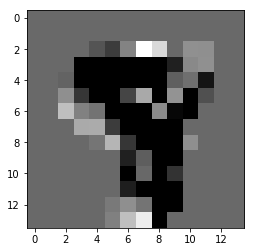

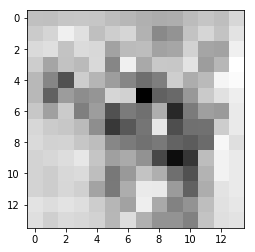

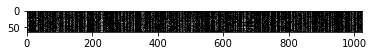

iter:  1700 train_cost:  109.10492 train_acc:  0.984375 test_cost:  318.07227 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


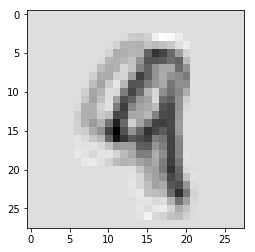

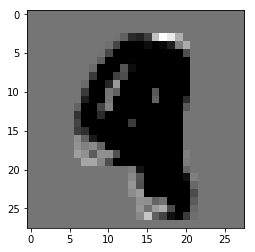

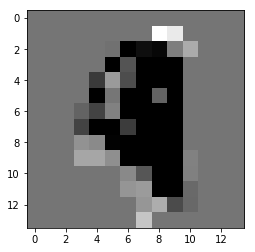

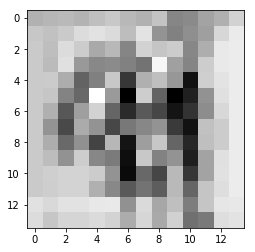

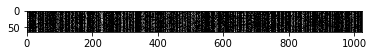

iter:  1800 train_cost:  8.773163 train_acc:  0.984375 test_cost:  99.78009 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


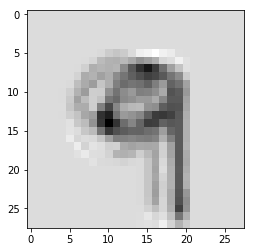

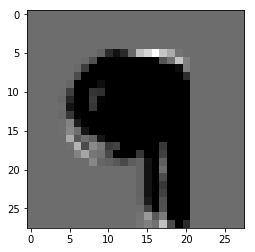

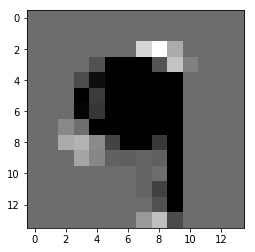

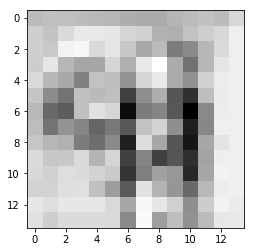

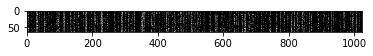

iter:  1900 train_cost:  158.08209 train_acc:  0.96875 test_cost:  16.370636 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


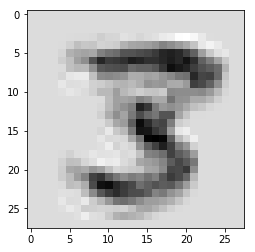

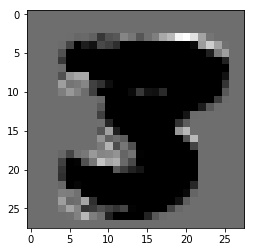

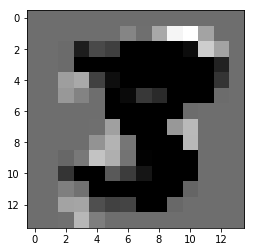

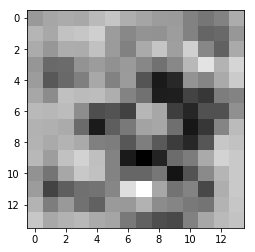

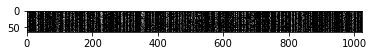

iter:  2000 train_cost:  0.0 train_acc:  1.0 test_cost:  201.34708 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


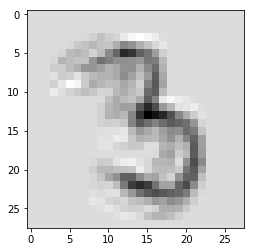

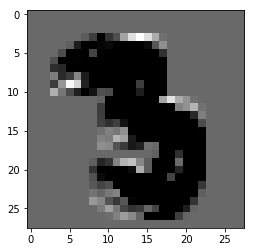

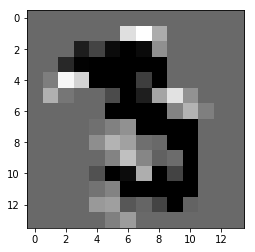

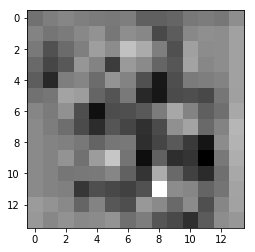

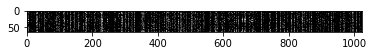

iter:  2100 train_cost:  0.0 train_acc:  1.0 test_cost:  122.16757 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


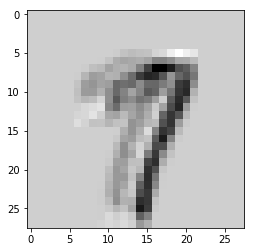

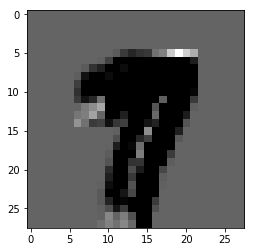

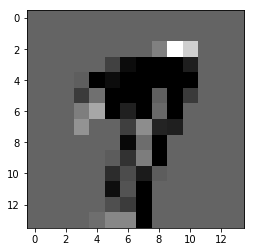

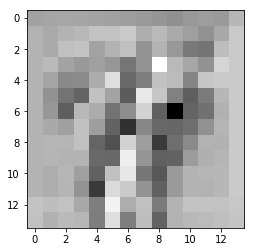

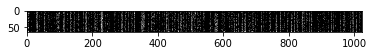

iter:  2200 train_cost:  0.21713258 train_acc:  0.984375 test_cost:  138.83931 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


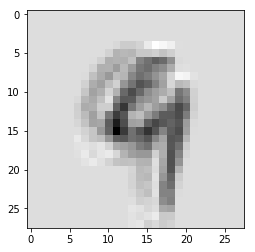

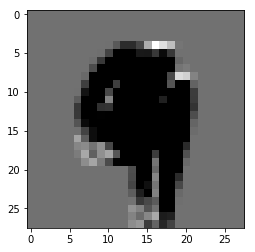

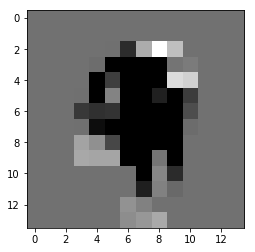

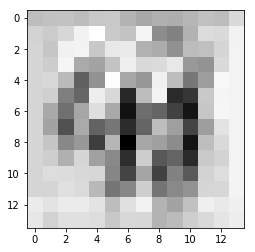

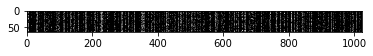

iter:  2300 train_cost:  0.0 train_acc:  1.0 test_cost:  540.3756 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


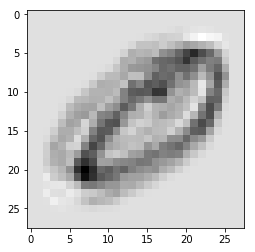

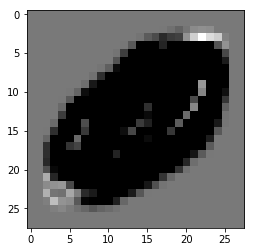

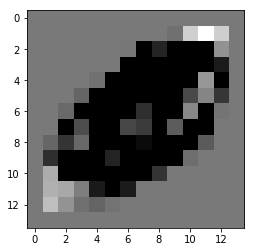

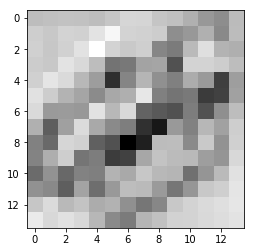

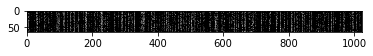

iter:  2400 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


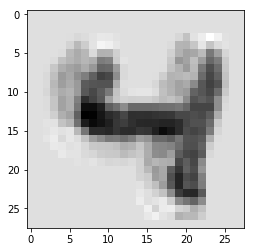

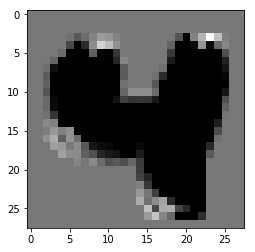

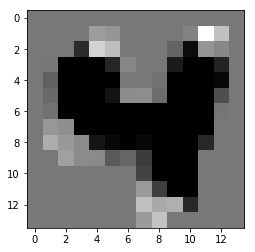

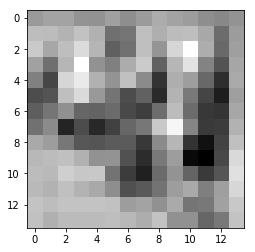

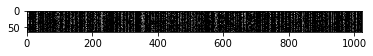

iter:  2500 train_cost:  0.0 train_acc:  1.0 test_cost:  170.16422 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


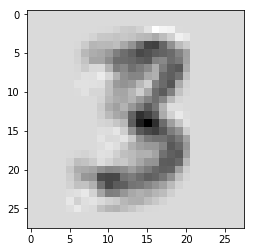

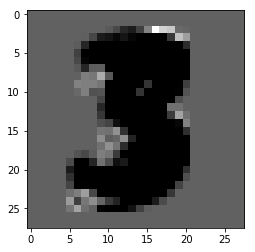

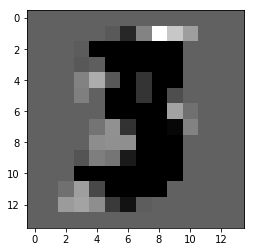

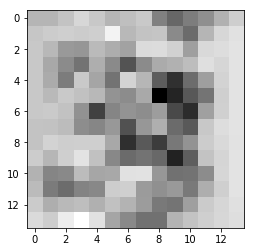

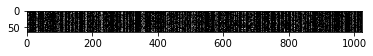

iter:  2600 train_cost:  0.0 train_acc:  1.0 test_cost:  458.13727 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


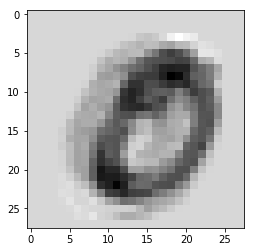

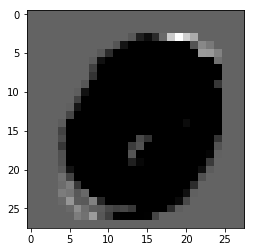

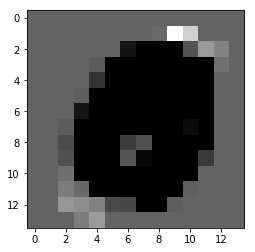

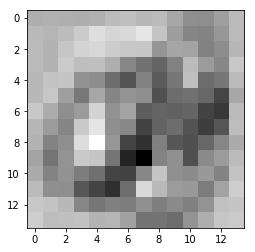

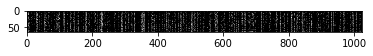

iter:  2700 train_cost:  36.12857 train_acc:  0.984375 test_cost:  141.41547 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


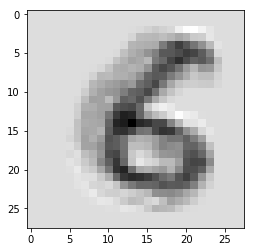

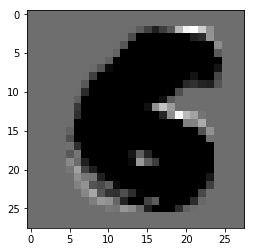

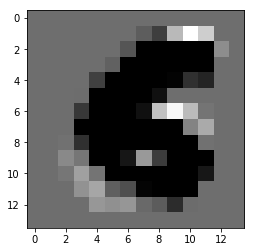

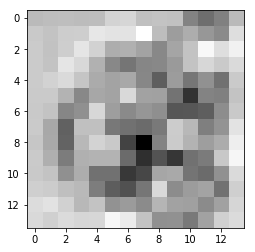

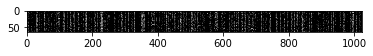

iter:  2800 train_cost:  139.86769 train_acc:  0.984375 test_cost:  168.57677 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


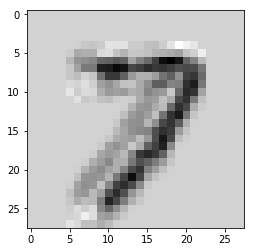

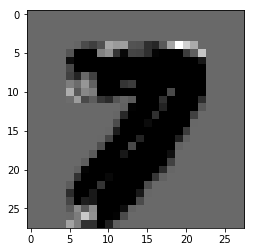

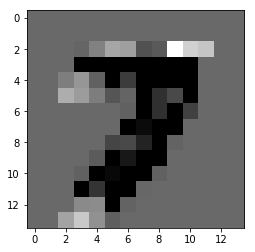

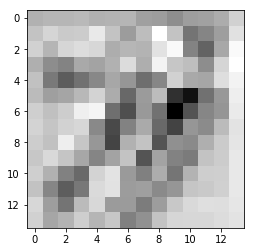

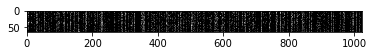

iter:  2900 train_cost:  0.0 train_acc:  1.0 test_cost:  0.9861145 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


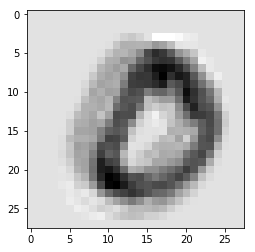

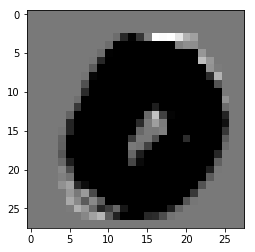

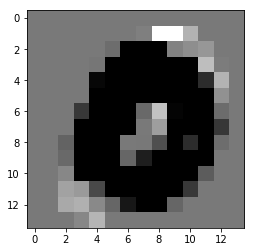

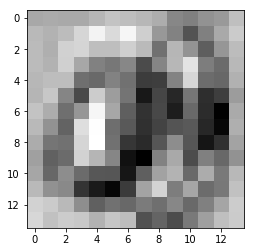

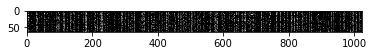

iter:  3000 train_cost:  17.387115 train_acc:  0.984375 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


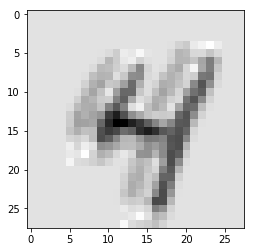

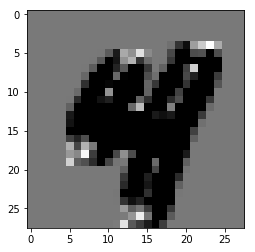

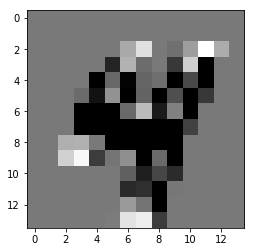

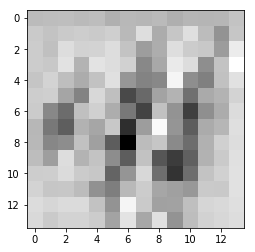

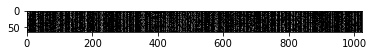

iter:  3100 train_cost:  0.0 train_acc:  1.0 test_cost:  0.0 test_acc:  1.0 num_of_returned_sensors: 7
(64, 1024)


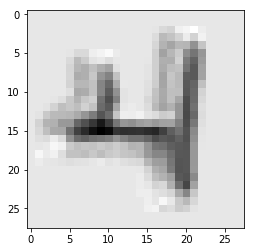

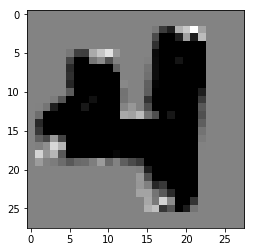

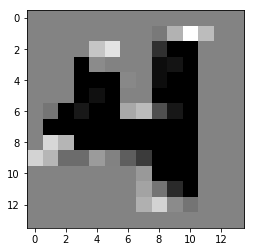

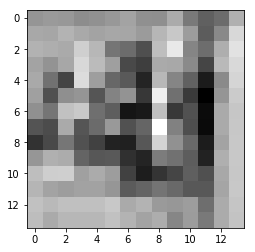

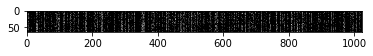

iter:  3200 train_cost:  14.610565 train_acc:  0.984375 test_cost:  309.6071 test_acc:  0.953125 num_of_returned_sensors: 7
(64, 1024)


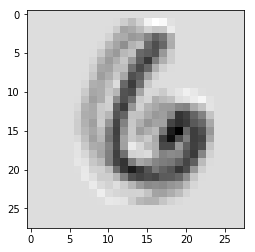

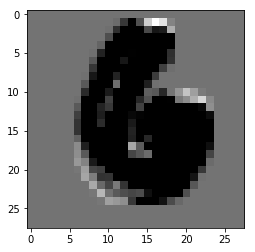

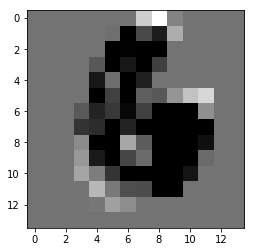

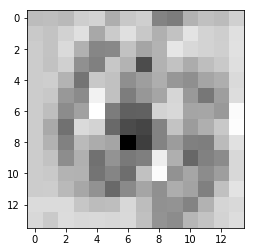

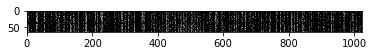

iter:  3300 train_cost:  0.0 train_acc:  1.0 test_cost:  13.168671 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


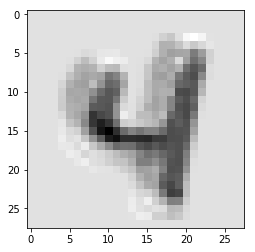

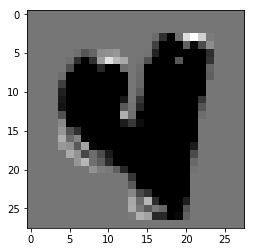

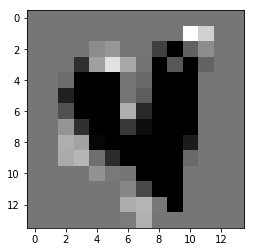

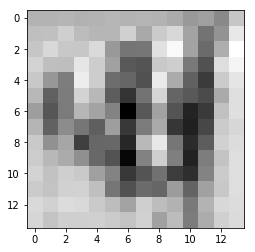

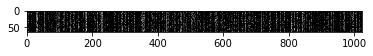

iter:  3400 train_cost:  8.084106 train_acc:  0.984375 test_cost:  98.131454 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


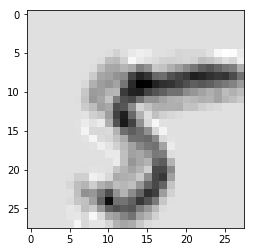

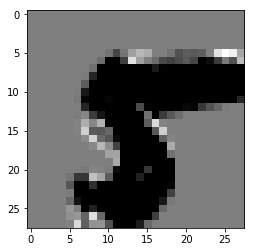

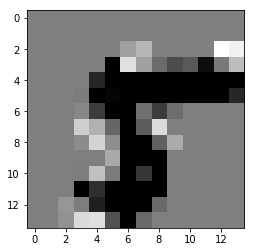

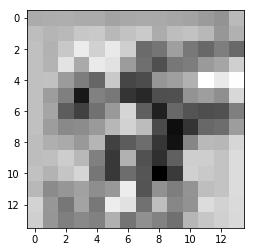

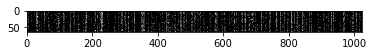

iter:  3500 train_cost:  0.0 train_acc:  1.0 test_cost:  141.37714 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


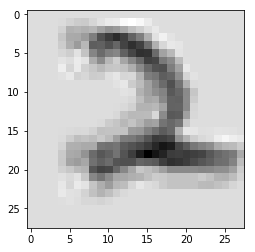

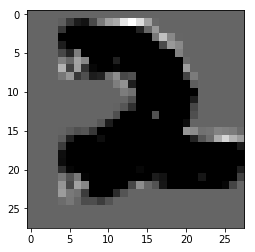

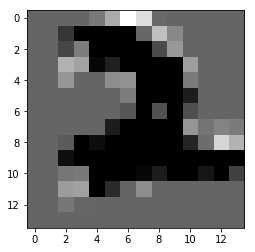

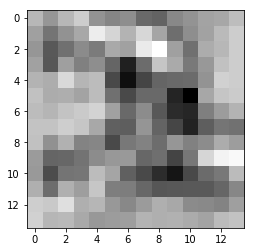

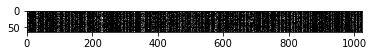

iter:  3600 train_cost:  1.6369629 train_acc:  0.984375 test_cost:  68.04057 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


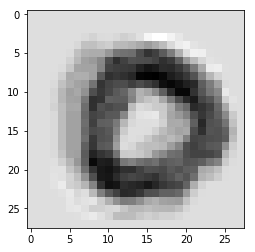

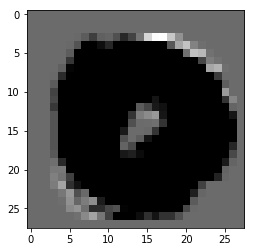

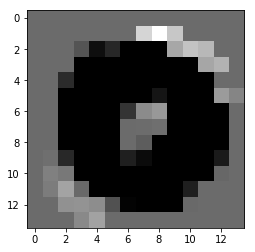

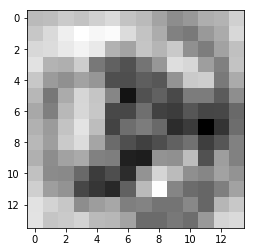

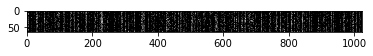

iter:  3700 train_cost:  192.6303 train_acc:  0.96875 test_cost:  17.24823 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


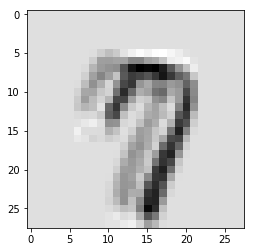

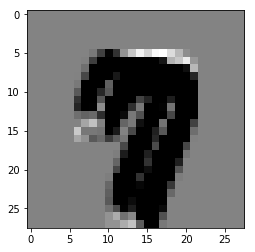

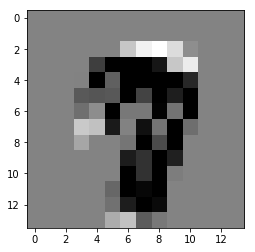

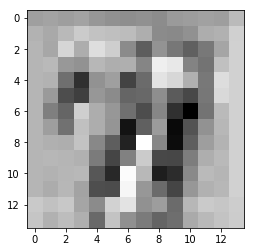

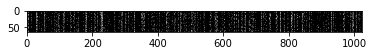

iter:  3800 train_cost:  0.0 train_acc:  1.0 test_cost:  16.535461 test_acc:  0.984375 num_of_returned_sensors: 7
(64, 1024)


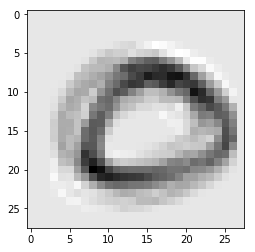

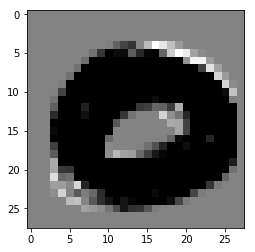

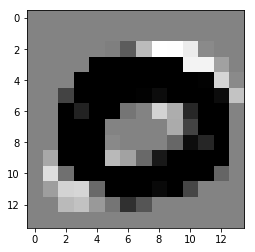

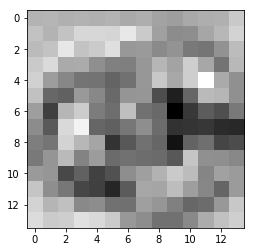

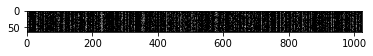

iter:  3900 train_cost:  0.0 train_acc:  1.0 test_cost:  209.23817 test_acc:  0.96875 num_of_returned_sensors: 7
(64, 1024)


KeyboardInterrupt: ignored

In [15]:
n_classes=10
learning_rate=0.002
batch_size=64

import tensorflow as tf

import matplotlib.pyplot as plt
# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return x


num_inputs = 784
num_outputs= 10

# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs],name = 'input')
y = tf.placeholder(tf.float32, [None, num_outputs],name =  'output')


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')


# Create model
def conv_net(x, weights, biases):
    # Reshape input picture
    
    with tf.name_scope('input-reshape'):
        x = tf.reshape(x, shape=[-1, 28, 28, 1])

    with tf.name_scope('conv-1'):

        # Convolution Layer
        conv_pre_actv_1 = conv2d(x, weights['wc1'], biases['bc1'])
        conv_actv_1 = tf.nn.relu(conv_pre_actv_1)
        
        print('conv_actv_1 max',conv_actv_1.get_shape().as_list())

    with tf.name_scope('maxpooling-1'):
        
        # Max Pooling (down-sampling)
        conv1 = maxpool2d(conv_actv_1, k=2)
        print('con1_after max',conv1.get_shape().as_list())


    # Convolution Layer
    with tf.name_scope('conv-2'):

        conv_pre_actv_2 = conv2d(conv1, weights['wc2'], biases['bc2'])
        conv_actv_2 = tf.nn.relu(conv_pre_actv_2)

        
        print('con2_before max',conv_actv_2.get_shape().as_list())


    with tf.name_scope('maxpooling-2'):
        
     
        # Max Pooling (down-sampling)
        conv2 = maxpool2d(conv_actv_2, k=2)
        print('con2_after max', conv2.get_shape().as_list())

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    #wd1 numx3x3  wd1.get_shape() -> numx9 
    with tf.name_scope('flatten'):
    
        fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
        fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
        fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    #fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    with tf.name_scope('output'):
    
        out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
        
    list_of_tensors = [conv_pre_actv_1,conv_actv_1, conv1,conv_pre_actv_2,conv_actv_2, conv2, fc1]
    return out, list_of_tensors


# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32]), name="wc1"),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, n_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

y_p,list_of_tensors = conv_net(x, weights, biases)

#crossentropy cost
with tf.name_scope('cross_entropy'):

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_p, labels=y)) # cross entropy cost

#tf.summary.scalar('cross_entropy', cost)


# Evaluate model
with tf.name_scope('operations'):

    correct_pred = tf.equal(tf.argmax(y_p, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
#
merged = tf.summary.scalar('accuracy', accuracy)



# optimisation 
with tf.name_scope('optimisation'):

    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights
#merged = tf.summary.merge_all()

init = tf.global_variables_initializer()



# Launch the graph
with tf.Session() as sess:
    #graph_writer = tf.summary.FileWriter('./log/train', sess.graph)
    #graph_writer.add_summary()
    train_writer = tf.summary.FileWriter('./log/train', sess.graph)
    test_writer = tf.summary.FileWriter('./log/test')
    sess.run(init)
    print('started')
    
    for i in range(10000):
        
        
        
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        

        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})


        summary,train_cost , train_acc = sess.run([merged,cost,accuracy], feed_dict={x: batch_x,y: batch_y})
        train_writer.add_summary(summary, i)

        #print('started')

        test_batch_x, test_batch_y = mnist.test.next_batch(batch_size)

        summary,test_cost, test_acc  = sess.run([merged,cost,accuracy], feed_dict={x: test_batch_x,y: test_batch_y})
        train_writer.add_summary(summary, i)
        
        if i % 100 ==0:
            
           
            val_list_of_tensors = sess.run(list_of_tensors, feed_dict={x: test_batch_x})
            num_of_returned_sensors = len(val_list_of_tensors)
            
            print(val_list_of_tensors[-1].shape)
            
            imshow(val_list_of_tensors[0][0,:,:,0], cmap='gray')# conv1 pre-activation first input image first filter

            plt.show()
            imshow(val_list_of_tensors[1][0,:,:,0],  cmap='gray')# conv1 after-activation first input image first filter
            plt.show()

            
            imshow(val_list_of_tensors[2][0,:,:,0], cmap='gray')# conv2 pre-activation first input image first filter

            plt.show()
            imshow(val_list_of_tensors[3][0,:,:,0], cmap='gray')# conv2 after-activation first input image first filter
            plt.show()
            
            imshow(val_list_of_tensors[-1], cmap='gray')# conv2 pre-activation first input image first filter
            plt.show()


            print('iter: ',i, 'train_cost: ', train_cost, 'train_acc: ', train_acc,'test_cost: ', test_cost, 'test_acc: ', test_acc, 'num_of_returned_sensors:', num_of_returned_sensors )


    #y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    print('predicted ', y_p_p)
    print('real ', y_gr)



# Tensorboard viz


In [9]:
n_classes=10
learning_rate=0.002
batch_size=64

import tensorflow as tf

import matplotlib.pyplot as plt
# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return x


num_inputs = 784
num_outputs= 10

# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs],name = 'input')
y = tf.placeholder(tf.float32, [None, num_outputs],name =  'output')


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')


# Create model
def conv_net(x, weights, biases):
    # Reshape input picture
    
    with tf.name_scope('input-reshape'):
        x = tf.reshape(x, shape=[-1, 28, 28, 1])

    with tf.name_scope('conv-1'):

        # Convolution Layer
        conv_pre_actv_1 = conv2d(x, weights['wc1'], biases['bc1'])
        conv_actv_1 = tf.nn.relu(conv_pre_actv_1)
        
        print('conv_actv_1 max',conv_actv_1.get_shape().as_list())

    with tf.name_scope('maxpooling-1'):
        
        # Max Pooling (down-sampling)
        conv1 = maxpool2d(conv_actv_1, k=2)
        print('con1_after max',conv1.get_shape().as_list())


    # Convolution Layer
    with tf.name_scope('conv-2'):

        conv_pre_actv_2 = conv2d(conv1, weights['wc2'], biases['bc2'])
        conv_actv_2 = tf.nn.relu(conv_pre_actv_2)

        
        print('con2_before max',conv_actv_2.get_shape().as_list())


    with tf.name_scope('maxpooling-2'):
        
     
        # Max Pooling (down-sampling)
        conv2 = maxpool2d(conv_actv_2, k=2)
        print('con2_after max', conv2.get_shape().as_list())

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    #wd1 numx3x3  wd1.get_shape() -> numx9 
    with tf.name_scope('flatten'):
    
        fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
        fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
        fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    #fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    with tf.name_scope('output'):
    
        out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
        
    list_of_tensors = [conv_pre_actv_1,conv_actv_1, conv1,conv_pre_actv_2,conv_actv_2, conv2, fc1]
    return out, list_of_tensors


# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32]), name="wc1"),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, n_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

y_p,list_of_tensors = conv_net(x, weights, biases)

#crossentropy cost
with tf.name_scope('cross_entropy'):

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_p, labels=y)) # cross entropy cost

#tf.summary.scalar('cross_entropy', cost)


# Evaluate model
with tf.name_scope('accuracy'):

    correct_pred = tf.equal(tf.argmax(y_p, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
#
acc_summary = tf.summary.scalar('accuracy', accuracy)



# optimisation 
with tf.name_scope('optimisation'):

    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights
#merged = tf.summary.merge_all()

init = tf.global_variables_initializer()



# Launch the graph
with tf.Session() as sess:
    #graph_writer = tf.summary.FileWriter('./log/train', sess.graph)
    #graph_writer.add_summary()
    train_writer = tf.summary.FileWriter('./log/train', sess.graph)
    test_writer = tf.summary.FileWriter('./log/test')
    sess.run(init)
    print('started')
    
    for i in range(10000):
        
        
        
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        

        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})


        summary,train_cost , train_acc = sess.run([merged,cost,accuracy], feed_dict={x: batch_x,y: batch_y})
        train_writer.add_summary(summary, i)

        #print('started')

        test_batch_x, test_batch_y = mnist.test.next_batch(batch_size)

        summary,test_cost, test_acc  = sess.run([merged,cost,accuracy], feed_dict={x: test_batch_x,y: test_batch_y})
        train_writer.add_summary(summary, i)
        
        if i % 100 ==0:
            
           
            val_list_of_tensors = sess.run(list_of_tensors, feed_dict={x: test_batch_x})
            num_of_returned_sensors = len(val_list_of_tensors)
            
            print(val_list_of_tensors[-1].shape)
            
            imshow(val_list_of_tensors[0][0,:,:,0], cmap='gray')# conv1 pre-activation first input image first filter

            plt.show()
            imshow(val_list_of_tensors[1][0,:,:,0],  cmap='gray')# conv1 after-activation first input image first filter
            plt.show()

            
            imshow(val_list_of_tensors[2][0,:,:,0], cmap='gray')# conv2 pre-activation first input image first filter

            plt.show()
            imshow(val_list_of_tensors[3][0,:,:,0], cmap='gray')# conv2 after-activation first input image first filter
            plt.show()
            
            imshow(val_list_of_tensors[-1], cmap='gray')# conv2 pre-activation first input image first filter
            plt.show()


            print('iter: ',i, 'train_cost: ', train_cost, 'train_acc: ', train_acc,'test_cost: ', test_cost, 'test_acc: ', test_acc, 'num_of_returned_sensors:', num_of_returned_sensors )


    #y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    print('predicted ', y_p_p)
    print('real ', y_gr)



conv_actv_1 max [None, 28, 28, 32]
con1_after max [None, 14, 14, 32]
con2_before max [None, 14, 14, 64]
con2_after max [None, 7, 7, 64]
started


InvalidArgumentError: ignored

In [10]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2019-06-06 08:45:55--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.71.139.107, 3.92.108.98, 35.173.6.94, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.71.139.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16648024 (16M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  15.88M  52.7MB/s    in 0.3s    

2019-06-06 08:45:55 (52.7 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [16648024/16648024]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
!rm -rf log

In [0]:
LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

In [14]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://5a4fa288.ngrok.io
